In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
train_data = pd.read_csv('mnist_train.csv', header=None)
test_data = pd.read_csv('mnist_test.csv', header=None)

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (60000, 785)
Test Data Shape: (10000, 785)


In [33]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ",  y_test.shape)

X_train: (60000, 784) y_train: (60000,)
X_test:  (10000, 784) y_test:  (10000,)


In [39]:
rf1 = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)
rf1.fit(X_train, y_train)
print("OOB accuracy estimate:", rf1.oob_score_)

OOB accuracy estimate: 0.9649333333333333


Test accuracy: 0.9705


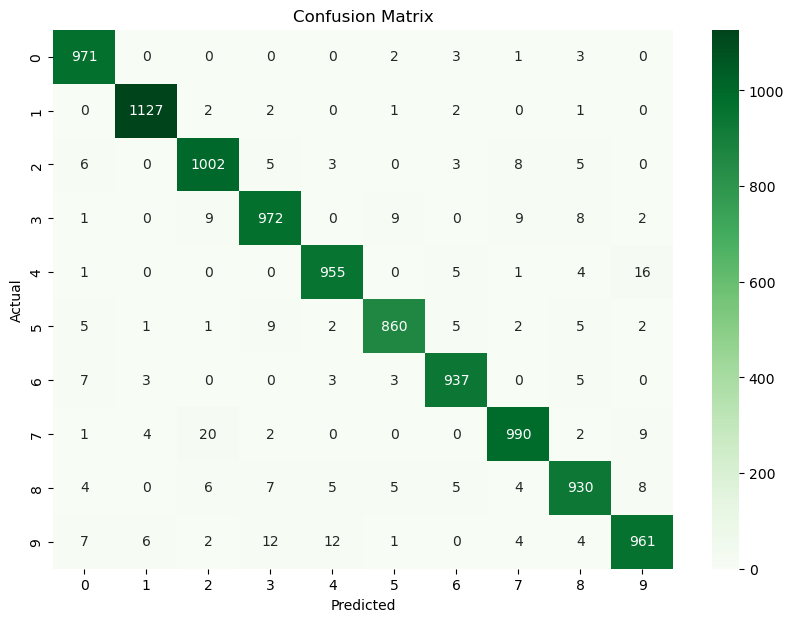

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [40]:
y_pred1 = rf1.predict(X_test)

acc = accuracy_score(y_test, y_pred1)
print(f"Test accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred1))

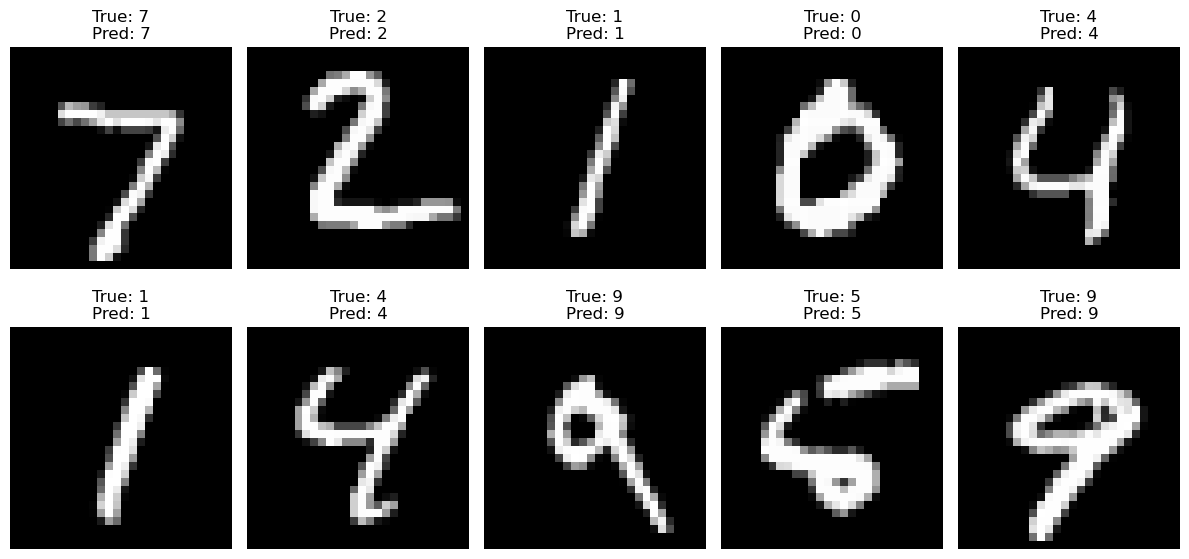

In [38]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    img = X_test.iloc[i].values.reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"True: {y_test.iloc[i]}\nPred: {y_pred[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [45]:
rf2 = RandomForestClassifier(
    n_estimators=50,
    oob_score=True,
    random_state=42
)
rf2.fit(X_train, y_train)
print("OOB accuracy estimate:", rf2.oob_score_)

y_pred2 = rf2.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred2))

OOB accuracy estimate: 0.9581166666666666
Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [46]:
rf3 = RandomForestClassifier(
    n_estimators=250,
    oob_score=True,
    random_state=42
)
rf3.fit(X_train, y_train)
print("OOB accuracy estimate:", rf3.oob_score_)

y_pred3 = rf3.predict(X_test)

acc = accuracy_score(y_test, y_pred3)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred3))

OOB accuracy estimate: 0.9690166666666666
Test accuracy: 0.9711
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [48]:
rf4 = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    random_state=42
)
rf4.fit(X_train, y_train)
print("OOB accuracy estimate:", rf4.oob_score_)

y_pred4 = rf4.predict(X_test)

acc = accuracy_score(y_test, y_pred4)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred4))

OOB accuracy estimate: 0.9702166666666666
Test accuracy: 0.9713
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [49]:
rf5 = RandomForestClassifier(
    n_estimators=750,
    oob_score=True,
    random_state=42
)
rf5.fit(X_train, y_train)
print("OOB accuracy estimate:", rf5.oob_score_)

y_pred5 = rf5.predict(X_test)

acc = accuracy_score(y_test, y_pred5)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred5))

OOB accuracy estimate: 0.9705666666666667
Test accuracy: 0.9718
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [50]:
rf6 = RandomForestClassifier(
    n_estimators=800,
    oob_score=True,
    random_state=42
)
rf6.fit(X_train, y_train)
print("OOB accuracy estimate:", rf6.oob_score_)

y_pred6 = rf6.predict(X_test)

acc = accuracy_score(y_test, y_pred6)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred6))

OOB accuracy estimate: 0.97045
Test accuracy: 0.9721
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [52]:
rf7 = RandomForestClassifier(
    n_estimators=1000,
    oob_score=True,
    random_state=42
)
rf7.fit(X_train, y_train)
print("OOB accuracy estimate:", rf7.oob_score_)

y_pred7= rf7.predict(X_test)

acc = accuracy_score(y_test, y_pred7)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred7))

OOB accuracy estimate: 0.9704833333333334
Test accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [53]:
rf8 = RandomForestClassifier(
    n_estimators=500,
    max_features=2,
    oob_score=True,
    random_state=42
)
rf8.fit(X_train, y_train)
print("OOB accuracy estimate:", rf8.oob_score_)

y_pred8= rf8.predict(X_test)

acc = accuracy_score(y_test, y_pred8)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred8))

OOB accuracy estimate: 0.9620333333333333
Test accuracy: 0.9622
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.95      0.94      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [54]:
rf9 = RandomForestClassifier(
    n_estimators=500,
    max_features=500,
    oob_score=True,
    random_state=42
)
rf9.fit(X_train, y_train)
print("OOB accuracy estimate:", rf9.oob_score_)

y_pred9= rf9.predict(X_test)

acc = accuracy_score(y_test, y_pred9)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred9))

OOB accuracy estimate: 0.9665833333333333
Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [55]:
rf10 = RandomForestClassifier(
    n_estimators=500,
    max_features=50,
    oob_score=True,
    random_state=42
)
rf10.fit(X_train, y_train)
print("OOB accuracy estimate:", rf10.oob_score_)

y_pred10= rf10.predict(X_test)

acc = accuracy_score(y_test, y_pred9)
print(f"Test accuracy: {acc:.4f}")

'''cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''

print(classification_report(y_test, y_pred10))

OOB accuracy estimate: 0.9706833333333333
Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



C:\Users\subar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


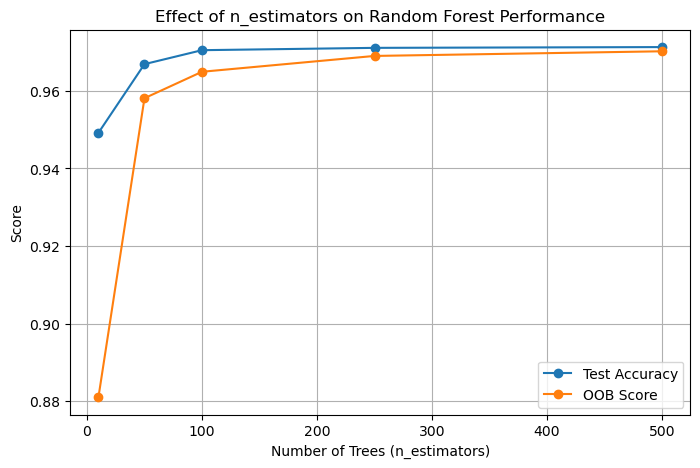

In [58]:
n_values = [10, 50, 100, 250, 500]
records = []

for n in n_values:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',
        oob_score=True,
        n_jobs=-1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    records.append({
        'n_estimators': n,
        'test_accuracy': accuracy_score(y_test, y_pred),
        'oob_score': rf.oob_score_
    })

df = pd.DataFrame(records)

plt.figure(figsize=(8, 5))
plt.plot(df['n_estimators'], df['test_accuracy'], label='Test Accuracy', marker='o')
plt.plot(df['n_estimators'], df['oob_score'],      label='OOB Score',      marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Score')
plt.title('Effect of n_estimators on Random Forest Performance')
plt.legend()
plt.grid(True)
plt.show()